In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
from my_utils import *

![image](microstrip.png)

In [2]:
def Z_microstrip(w_um=245,h_um=140,t_um=40,eps_r=4.3):
    # arguments in um,
    # formula in mil
    w_mil = w_um*1e-6/25.4e-6
    h_mil = h_um*1e-6/25.4e-6
    t_mil = t_um*1e-6/25.4e-6
    
    return 87./np.sqrt(1.41 + eps_r) * np.log((5.98*h_mil)/(0.8*w_mil+t_mil))

In [3]:
interact(Z_microstrip,
         w_um=(80,1000,5),
         h_um=(10,500,5),
         t_um=(10,50,2),
         eps_r = (1,6,0.1)
        )

interactive(children=(IntSlider(value=245, description='w_um', max=1000, min=80, step=5), IntSlider(value=140,…

<function __main__.Z_microstrip(w_um=245, h_um=140, t_um=40, eps_r=4.3)>

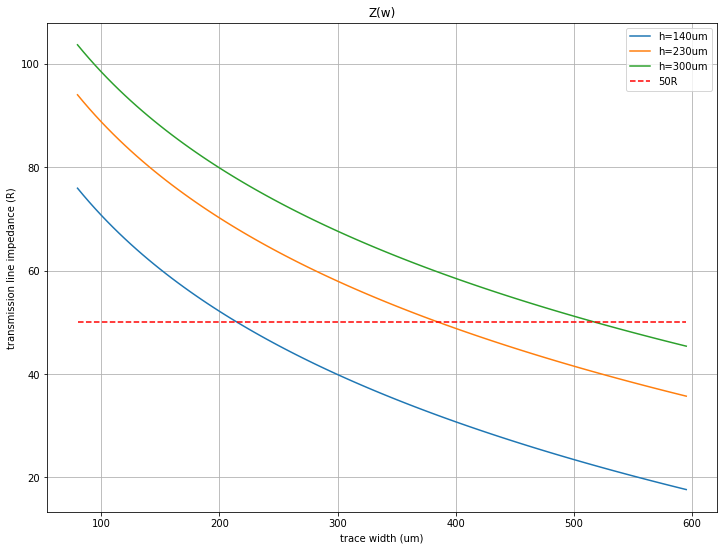

In [4]:
big_figure()

for h in [140,230,300]:

    w_vec = np.arange(80,600,5)
    Z_vec = Z_microstrip(w_um=w_vec,h_um=h)

    plt.plot(w_vec,Z_vec,label="h={}um".format(h))
    
plt.plot(w_vec,w_vec*0+50,"--",label="50R",color="red")
plt.title("Z(w)")
plt.xlabel("trace width (um)")
plt.ylabel("transmission line impedance (R)")
plt.legend()
plt.grid(True)
plt.show()